# Project for Applied Statistics as part of the higher diploma in Computer Science and Data Analytics 2024


This project will be looking at the [PlantGrowth R dataset](https://vincentarelbundock.github.io/Rdatasets/doc/datasets/PlantGrowth.html).  This is a collection of data from an experiment where plants were given two different treatment conditions (plus a control)and their yield was then compared. 

The tasks objectives of the project are below;

1. Download and save the dataset to your repository.

2. Describe the data set in your notebook.

3. Describe what a t-test is, how it works, and what the assumptions are.

4. Perform a t-test to determine whether there is a significant difference between the two treatment groups trt1 and trt2.

5. Perform ANOVA to determine whether there is a significant difference between the three treatment groups ctrl, trt1, and trt2.

6. Explain why it is more appropriate to apply ANOVA rather than several t-tests when analyzing more than two groups.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns


c:\Users\kolea\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Task 1
Download and save the dataset to your repository

In [2]:
df = pd.read_csv("Data/PlantGrowth.csv")  
df

,rownames,weight,group
0,1,4.17,ctrl
1,2,5.58,ctrl
2,3,5.18,ctrl
3,4,6.11,ctrl
4,5,4.50,ctrl
5,6,4.61,ctrl
6,7,5.17,ctrl
7,8,4.53,ctrl
8,9,5.33,ctrl
9,10,5.14,ctrl


In [3]:
# remove column rownames
df = df.drop(["rownames"], axis=1) 
df


,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl
5,4.61,ctrl
6,5.17,ctrl
7,4.53,ctrl
8,5.33,ctrl
9,5.14,ctrl


## Task 2

Describe the data set in your notebook.


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   weight  30 non-null     float64
 1   group   30 non-null     object 
dtypes: float64(1), object(1)
memory usage: 612.0+ bytes


We can see from the above that dataframe up of 30 samples taken from 3 different groups, Control (ctrl), Treatment 1 (trt1) and Treatment 2 (trt2). Next we will plot their weights to show the distribution.

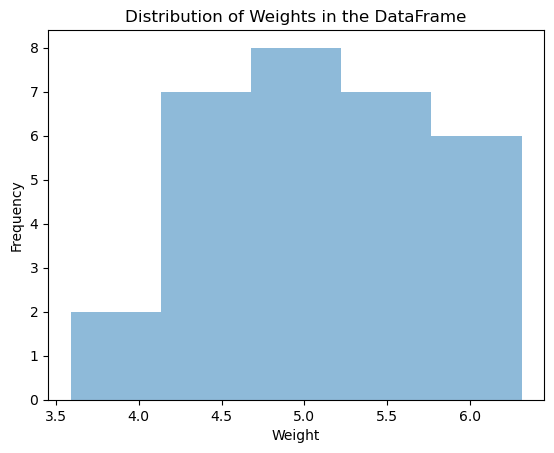

In [5]:
# Plot of the dataframe

#Square Root Rule for number of bins

b = int(np.sqrt(30))
b

plt.hist(df["weight"], b, alpha= 0.5, label="control")
plt.xlabel("Weight")
plt.ylabel("Frequency")
plt.title("Distribution of Weights in the DataFrame")
plt.show()

In [6]:
ctrl = df[df["group"]=="ctrl"]
ctrl.describe()

,weight
count,10.000000
mean,5.032000
std,0.583091
min,4.170000
25%,4.550000
50%,5.155000
75%,5.292500
max,6.110000


There are 10 samples from the control group and the average weight is 5.03 grams

In [7]:
trt1 = df[df["group"]=="trt1"]
trt1.describe()

,weight
count,10.000000
mean,4.661000
std,0.793676
min,3.590000
25%,4.207500
50%,4.550000
75%,4.870000
max,6.030000


There are 10 samples from the Treatment 1 group and the average weight is 4.66 grams

In [8]:
trt2 = df[df["group"]=="trt2"]
trt2.describe()

,weight
count,10.000000
mean,5.526000
std,0.442573
min,4.920000
25%,5.267500
50%,5.435000
75%,5.735000
max,6.310000


There are 10 samples from the Treatment 2 group and the average weight is 5.53 grams

In [9]:
ctrl

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl
5,4.61,ctrl
6,5.17,ctrl
7,4.53,ctrl
8,5.33,ctrl
9,5.14,ctrl


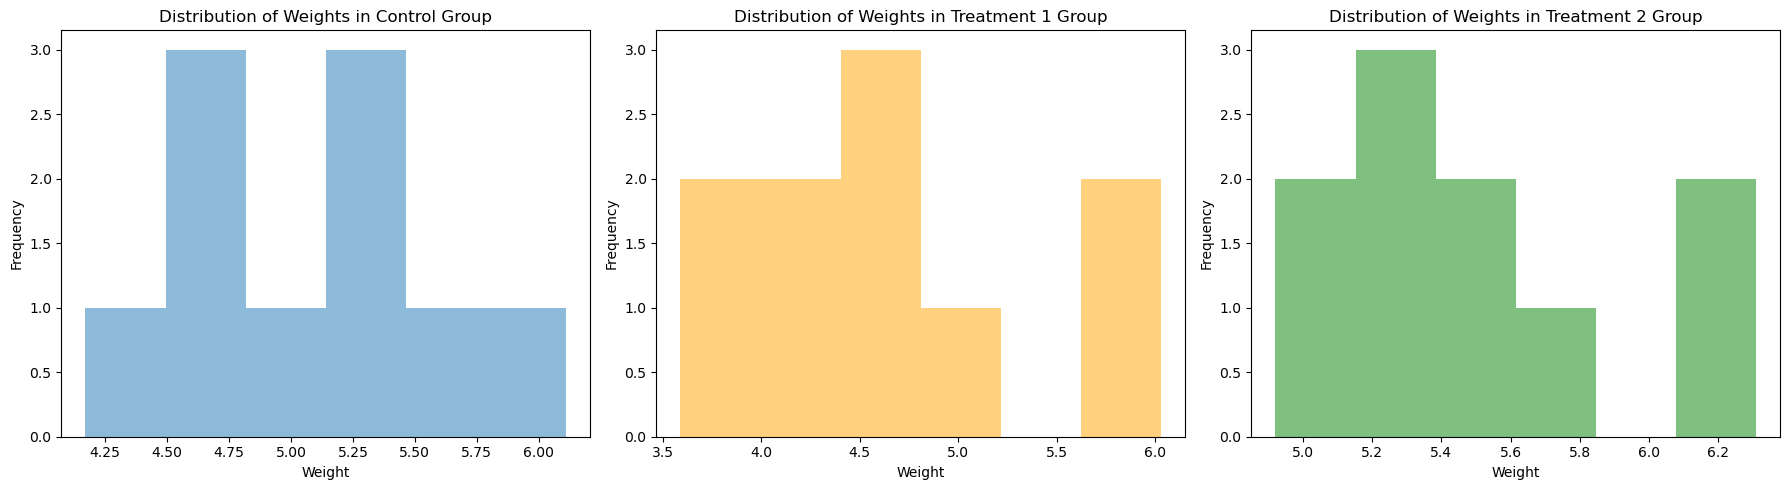

In [10]:
# Create plot for all 3 groups
fig, axs = plt.subplots(1, 3, figsize=(18, 5))

# Plot the control group
axs[0].hist(ctrl['weight'], bins=6, alpha=0.5, label="control")
axs[0].set_xlabel("Weight")
axs[0].set_ylabel("Frequency")
axs[0].set_title("Distribution of Weights in Control Group")

# Plot the treatment 1 group
axs[1].hist(trt1['weight'], bins=6, alpha=0.5, label="group1", color="orange")
axs[1].set_xlabel("Weight")
axs[1].set_ylabel("Frequency")
axs[1].set_title("Distribution of Weights in Treatment 1 Group")

# Plot the group 2
axs[2].hist(trt2['weight'], bins=6, alpha=0.5, label="group2", color="green")
axs[2].set_xlabel("Weight")
axs[2].set_ylabel("Frequency")
axs[2].set_title("Distribution of Weights in Treatment 2 Group")

# Show the plot
plt.tight_layout()
plt.show()

### Shapiro-Wilkes Test

The [Shapiro-Wilkes](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.shapiro.html) test checks if an array fits a normal distribution. It will give 2 outputs, a statistic value and a p-value. 

The statistic value ranges from 0-1 and measures how closely your data fits the bell curve of a normal distribution. A value closer to 1 means your vales are closer to a normal distribution.

The null hypothesis in this case is that the data is normally distributed. The P-value gives a probability that your values could look like they do if they come from a normal distribution. Anything below .05 would be strong evidence that your values arent 'normal'.

In [11]:
# Checks if the Control group fits a normal distribution

ctrl_statistic, ctrl_p_values = stats.shapiro(ctrl['weight'])
ctrl_statistic
#ctrl_p_values

0.9566815495491028

In [12]:
print("The Shapiro Wilkes test has given a statistic value of {} for the control group. Any value close to 1 would give a bell curve distribution. This combined with a high p-value of {} would indicate it has a normal distribution.".format(ctrl_statistic, ctrl_p_values))

The Shapiro Wilkes test has given a statistic value of 0.9566815495491028 for the control group. Any value close to 1 would give a bell curve distribution. This combined with a high p-value of 0.7474744915962219 would indicate it has a normal distribution.


In [13]:
# Checks if the Treatment 1 group fits a normal distribution

trt1_statistic, trt1_p_values = stats.shapiro(trt1['weight'])
trt1_statistic
#trt2_p_values

0.9304108619689941

In [14]:
print("The test has given a statistic value of {} for the Treatment 1 group, indicating a bell curve distribution. The relatively high p-value of {} shows there is no reason to reject the null hypothesis.".format(trt1_statistic, trt1_p_values))

The test has given a statistic value of 0.9304108619689941 for the Treatment 1 group, indicating a bell curve distribution. The relatively high p-value of 0.451945960521698 shows there is no reason to reject the null hypothesis.


In [15]:
# Checks if the Treatment 1 group fits a normal distribution

trt2_statistic, trt2_p_values = stats.shapiro(trt2['weight'])
trt2_statistic
#trt2_p_values

0.941005289554596

In [16]:
print("Again the test has given a high statistic value of {} for the Treatment 2 group, indicating a normal distribution. The  high p-value of {} shows there is no reason to reject the null hypothesis.".format(trt2_statistic, trt2_p_values))

Again the test has given a high statistic value of 0.941005289554596 for the Treatment 2 group, indicating a normal distribution. The  high p-value of 0.5642533898353577 shows there is no reason to reject the null hypothesis.


From the above Shapiro tests, there is nothing to indicate any of the 3 groups don't follow a normal distribution. 

Next we will look at our groups distribution on a [strip plot](https://seaborn.pydata.org/generated/seaborn.stripplot.html).

c:\Users\kolea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kolea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
c:\Users\kolea\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1075: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='group', ylabel='weight'>

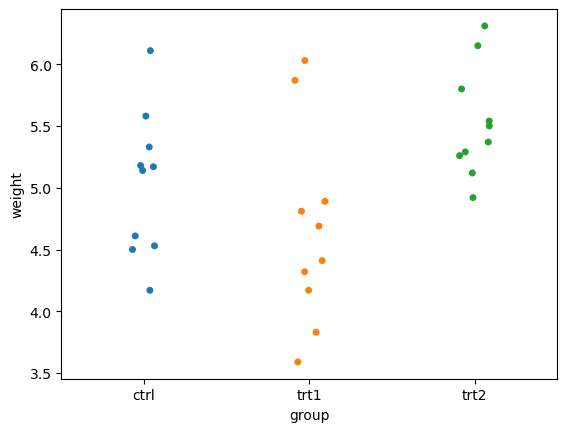

In [17]:
# Plot them on stripplot

sns.stripplot(data=df, x ="group", y="weight", hue="group", legend=False)

Just from looking at the plot above it is difficult to see much of a change from Treatment 1 group in comparison to the control. They both seem to be distributed roughly around the 5g mark. There may be a slight decrease in yield using treatment 1 from this plot but it will need further investigation.

However it is noticeable that treatment 2 group seems to have a higher yield. The values centre around 5.5g with very few samples below 5g.

### T-Test

The [t-statistic](https://www.statisticshowto.com/t-statistic) is a way of measuring if two groups of data are significantly different from each other. 


There are [3](https://www.jmp.com/en_ch/statistics-knowledge-portal/t-test.html) different types of t-tests;
- a one sample t-test: This is comparing a single group to an already known value. 
- an independent t-test: This is comparing how two separate groups differ from each other. 
- a paired t-test: This compares the means of two related groups. An example would be before and after scenarios like we are dealing with in this question. 

There are 4 assumptions to bear in mind when conducting a t-test
- The data is continuous (cannot be categorical)
- The samples have been randomly sampled (avoiding selection bias)
- The variability of each group is similar (if the variability between the groups is big, it can distort the results)
- The distribution is normal (the t-test loses accuracy for non-normal distributions especially for smaller sample sizes eg. n<30)

In this context we will be looking at the two treatment groups to see if there is a significant difference between their yields. As they are two different samples we will be using an independent t-test. 

The formula for an independent t-test is;

$t = \frac{\bar{X}_1 - \bar{X}_2}{\sqrt{\frac{s_1}{n_1} + \frac{s_2}{n_2}}}$

where;
- $\bar{X}_1$ and $\bar{X}_2$ are the means for sample 1 and sample 2
- $s_1^2$ and $s_1^2$ are the standard deviations for each sample
- $n_1$ and $n_2$ are the number of values in a sample 1 and 2

The Null Hypothesis ($H_0$)for a t-test is that all samples are from the same group. Using a [SciPy t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html) a p-value is generate which tells you the probability of seeing the difference that you found if the null hypothesis is true. In order to disprove the null hypothesis a threshold is chosen, whereby a p-value less than this amount will disprove the null hypothesis. The standard threshhold ($a$) is 0.05.



In [41]:
# Convert our dataframes to arrays

ctrl_array = ctrl['weight'].to_numpy()
#ctrl_array

trt1_array = trt1['weight'].to_numpy()
trt1_array

trt2_array = trt2['weight'].to_numpy()
trt2_array

array([6.31, 5.12, 5.54, 5.5 , 5.37, 5.29, 4.92, 6.15, 5.8 , 5.26])

###  Treatment 1 vs Treatment 2

In [34]:
#Independent t-test using scipy
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html

t_stat, p_value = stats.ttest_ind(trt1_array, trt2_array)
t_stat, p_value


(-3.0100985421243616, 0.0075184261182198574)

After running the above t-test we get a value of 0.00751. As this is less than the threshold of 0.05, the null hypothesis has been rejected. There is a significant difference between the yield of both groups. The negative t-statistic means that the treatment 2 group had a larger yield than treatment 1.  

### ANOVA 


ANOVA (Anaylsis of Variance) like t-tests is a statistical tool used to compare variance across multiple groups. T-tests can be used when comparing two groups where as ANOVA can be used for multiple groups. 

Anova [measures both the variance between the groups and the variance within them](https://blog.minitab.com/en/adventures-in-statistics-2/understanding-analysis-of-variance-anova-and-the-f-test). It produces an f-statistic which is a ratio of between group variability and within group variability. 

As with T-tests the null hypothesis is that the samples are from the same group.

It is best to use a dataframe with columns for the classifier and the variable being examined. In this case we have $df$ that was created earlier.

In [43]:
#show df
df

,weight,group
0,4.17,ctrl
1,5.58,ctrl
2,5.18,ctrl
3,6.11,ctrl
4,4.50,ctrl
5,4.61,ctrl
6,5.17,ctrl
7,4.53,ctrl
8,5.33,ctrl
9,5.14,ctrl


In [49]:
#isolate the weight variable

ctrl_weight = df[df['group'] == 'ctrl']['weight'] 
trt1_weight = df[df['group'] == 'trt1']['weight'] 
trt2_weight = df[df['group'] == 'trt2']['weight'] 

In [52]:
#Perform Anova
f_statistic, p_value = stats.f_oneway(ctrl_weight, trt1_weight, trt2_weight)

#show results
f_statistic, p_value

(4.846087862380136, 0.0159099583256229)

As the f-statistic is a ratio of the difference between the groups, to the difference within the groups, the higher the F-statistic the larger the difference between the groups.

The p-value provided above, means there is 1.59% probability of observing this f-statistic (or higher) if the null hypothesis is true. As it is less than the accepted threshold of 0.05, it is sufficient to reject the null hypothesis and it indicates there is significant difference between the groups. 

While ANOVA is useful to show if there is a difference between your samples, it doesnt tell you which groups are different from each other. To find this out you can use post hoc tests like Tukeys Honestly Significant Difference (HSD).

In [ ]:
#Tukey's HSD
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.tukey_hsd.html

res = stats.tukey_hsd(ctrl_weight, trt1_weight, trt2_weight)

#show
print(res)

Tukey's HSD Pairwise Group Comparisons (95.0% Confidence Interval)
Comparison  Statistic  p-value  Lower CI  Upper CI
 (0 - 1)      0.371     0.391    -0.320     1.062
 (0 - 2)     -0.494     0.198    -1.185     0.197
 (1 - 0)     -0.371     0.391    -1.062     0.320
 (1 - 2)     -0.865     0.012    -1.556    -0.174
 (2 - 0)      0.494     0.198    -0.197     1.185
 (2 - 1)      0.865     0.012     0.174     1.556



Tukeys HSD evaluates the difference between each possible pair of groups in the dataset. It provides a statistic and p-value which we have seen previously in t-test but it also give confidence intervals. [If the confidence interval (lower-upper) contains 0 then the difference between the two groups is not statistically significant](https://support.minitab.com/en-us/minitab/help-and-how-to/statistical-modeling/anova/supporting-topics/multiple-comparisons/what-is-tukey-s-method/#:~:text=Tukey's%20method%20for%20multiple%20comparisons%20is%20used%20in%20ANOVA%20to,to%20a%20level%20you%20specify.).

Using this the only significant difference is between trt1 and trt2 with a confidence interval of [-1.556, -0.174]

### ANOVA vs T-Tests

As stated previously it is better to use ANOVA when comparing more than 2 groups. The first reason is that it is quicker. If you had 3 groups to compare as we did here you would need to do 3 t-tests, if you had 4, you would need to do 6 t-tests etc. With the $a$ of 0.05, it means there is still a chance of incorrectly rejecting the null hypothesis and getting a type 1 error. When you are performing multiple t-tests the [chances of errors increases](https://real-statistics.com/one-way-analysis-of-variance-anova/experiment-wise-error-rate/). ANOVA evaluates all groups simultaneously, which is not only quicker but keeps the error rate down.

# END